In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, SimpleExpSmoothing,Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("gold_monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [7]:
df.shape


(847, 2)

In [8]:
print(f"Date range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from - 1950-01 to 2020-07


In [9]:
date = pd.date_range(start = '1/1/1950',end = '8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [10]:
df['month']= date
df.drop('Date',axis=1, inplace = True)
df= df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


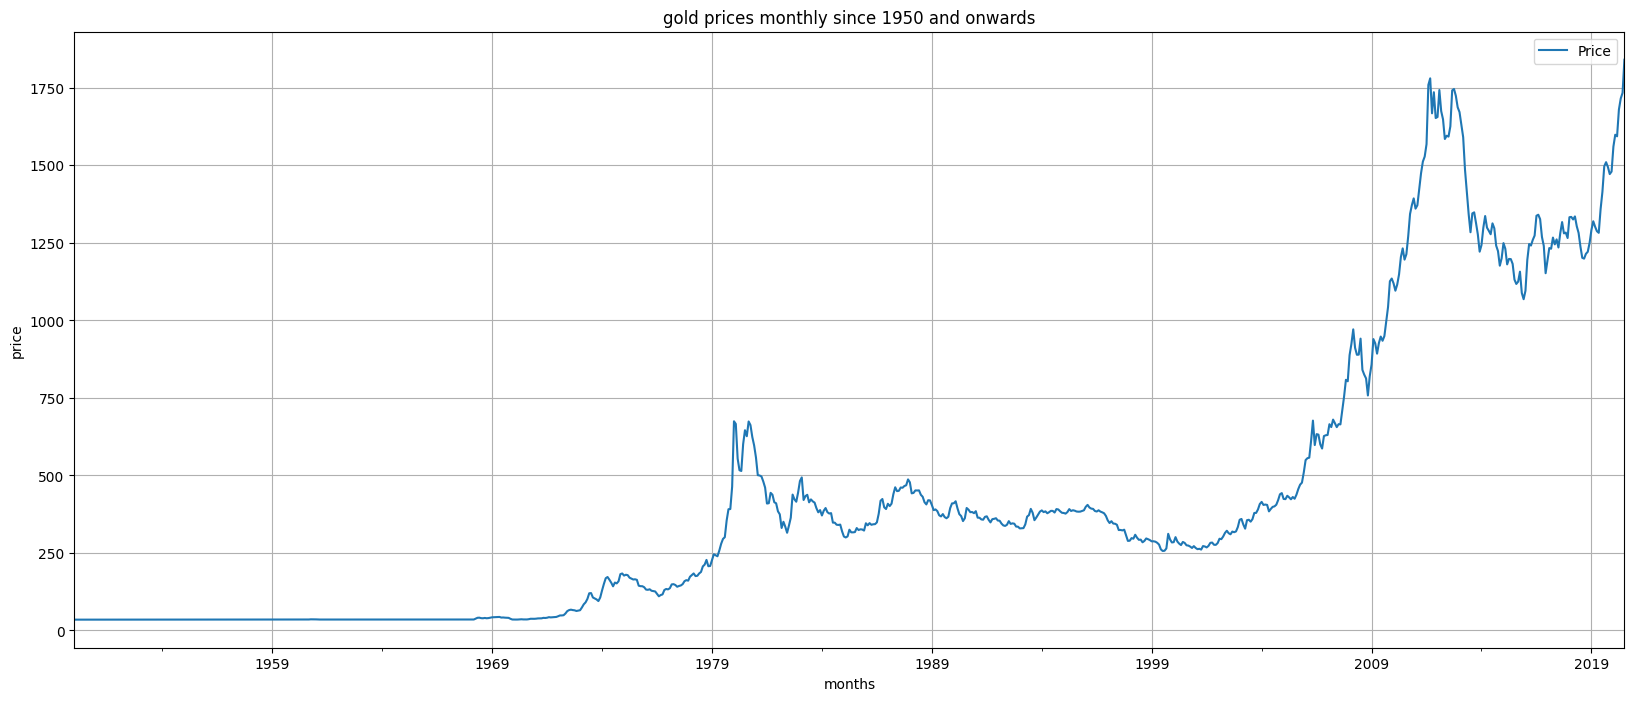

In [11]:
df.plot(figsize=(20,8))
plt.title("gold prices monthly since 1950 and onwards")
plt.xlabel("months")
plt.ylabel('price')
plt.grid();

In [12]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


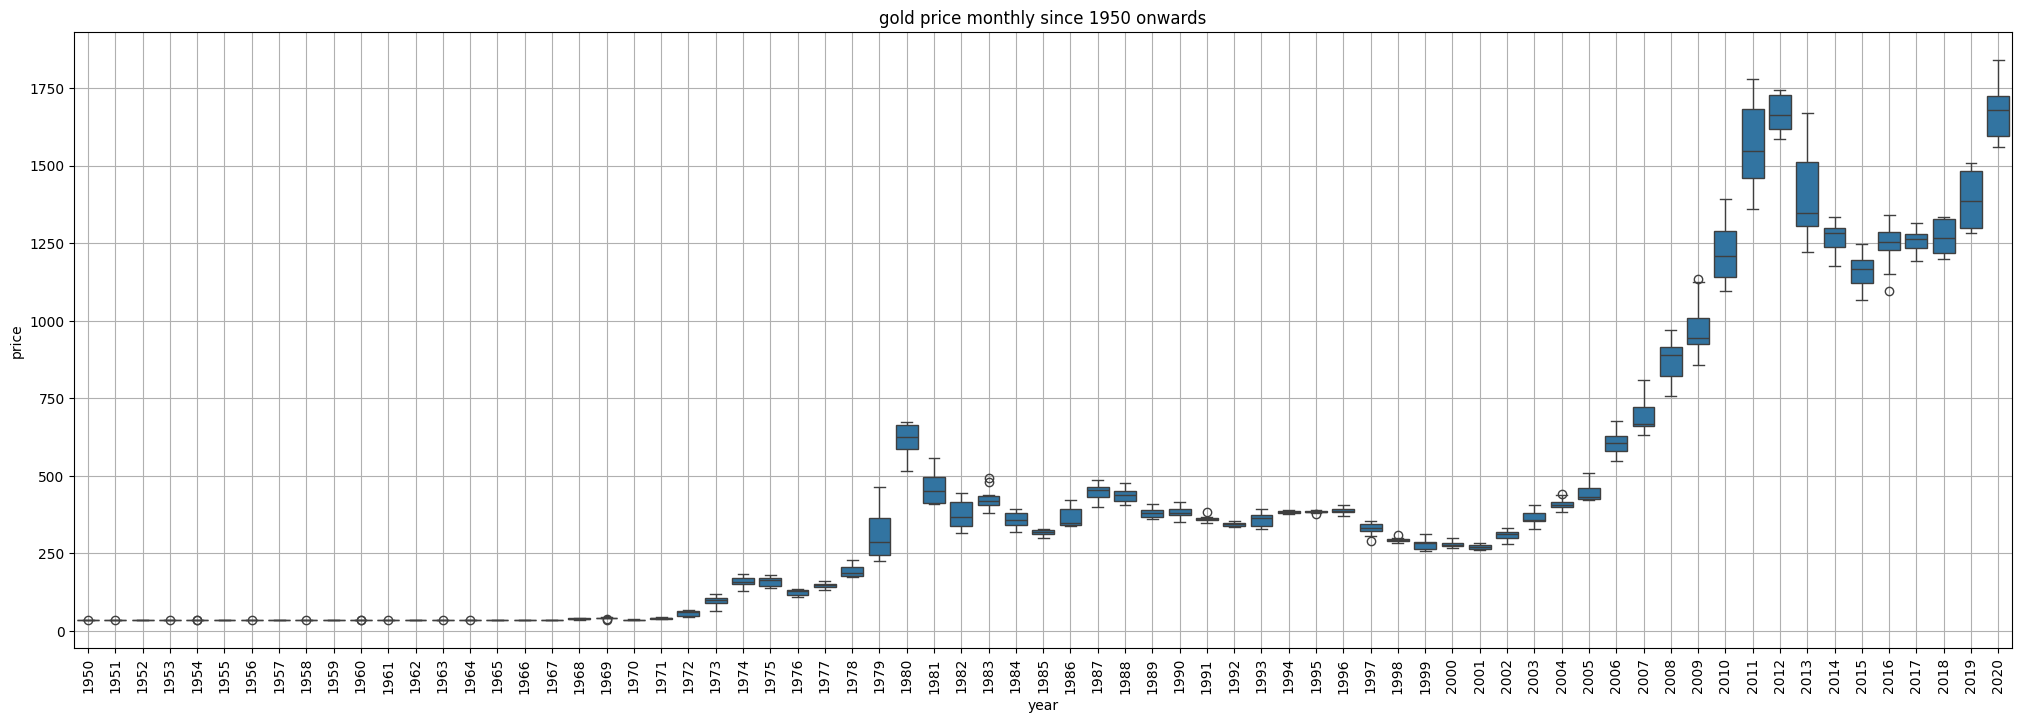

In [13]:
_,ax = plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel("year")
plt.ylabel("price")
plt.xticks(rotation=90)
plt.grid();

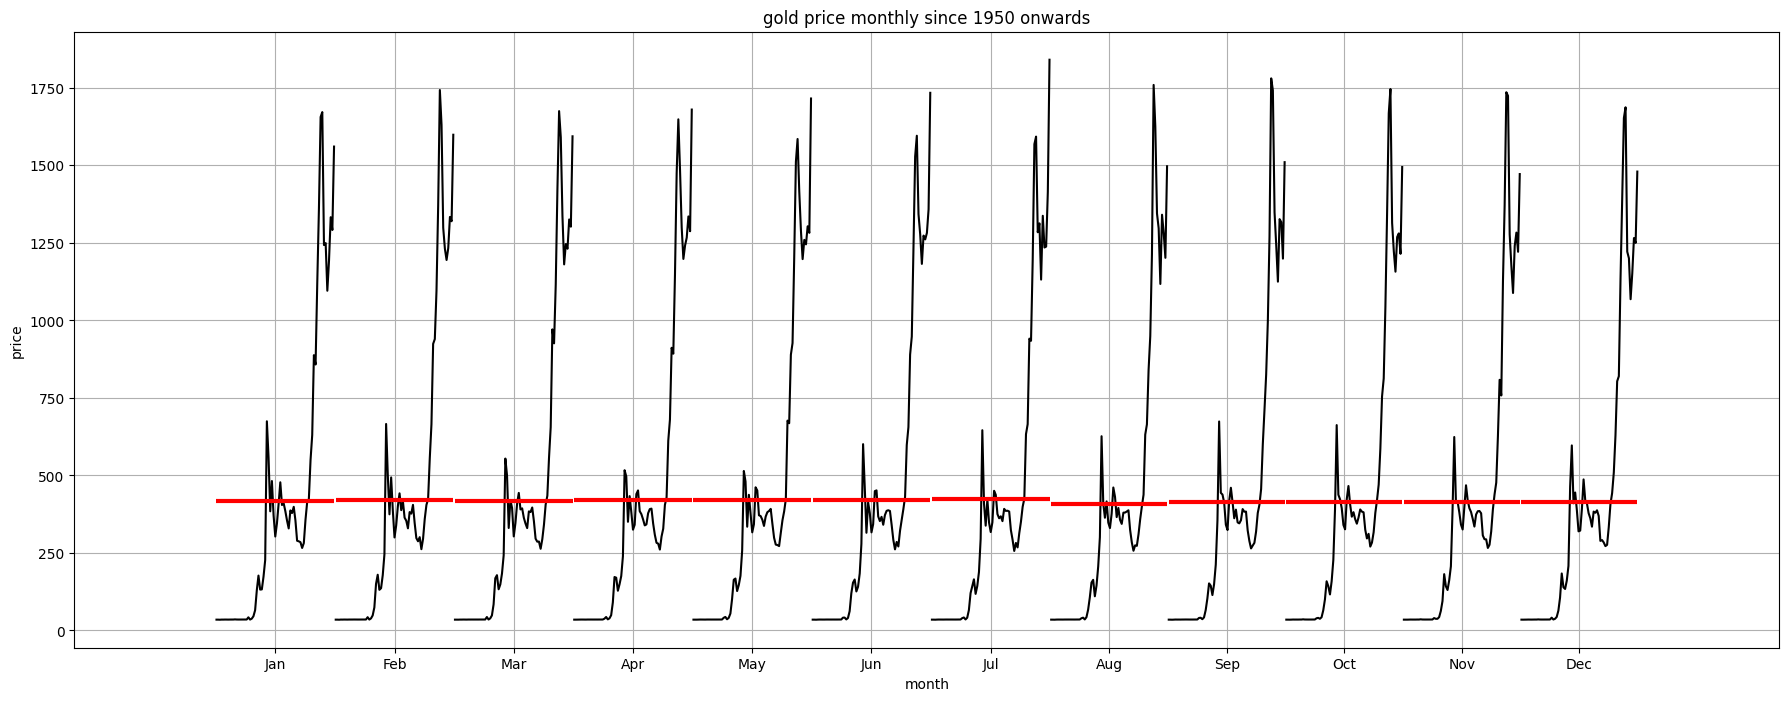

In [14]:
from statsmodels.graphics.tsaplots import month_plot
fig,ax = plt.subplots(figsize=(22,8))
month_plot(df,ylabel='gold price',ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

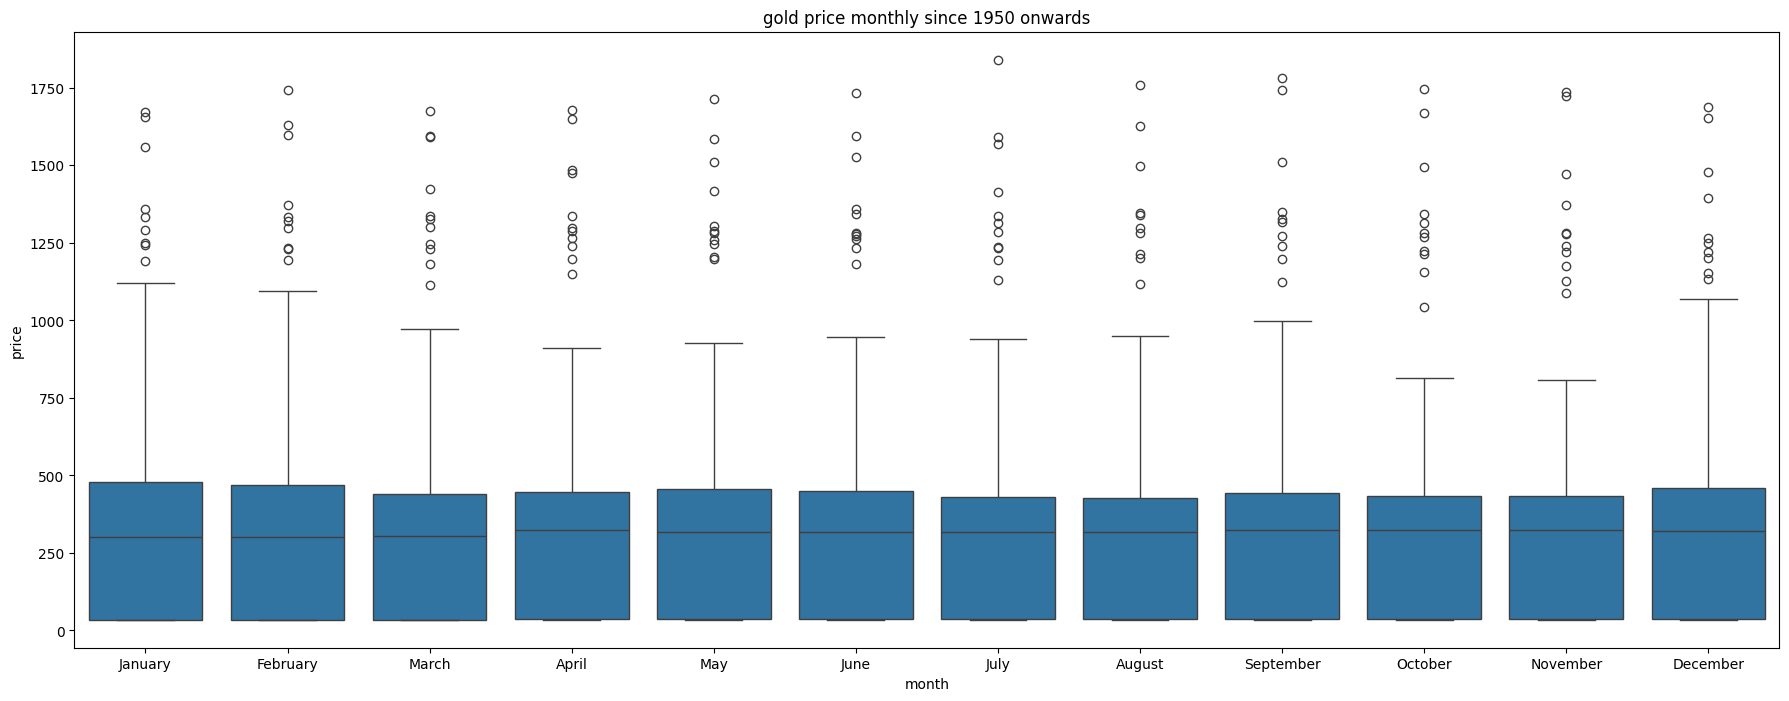

In [15]:
_,ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(), y=df.values[:,0],ax = ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel("month")
plt.ylabel("price")
plt.show();

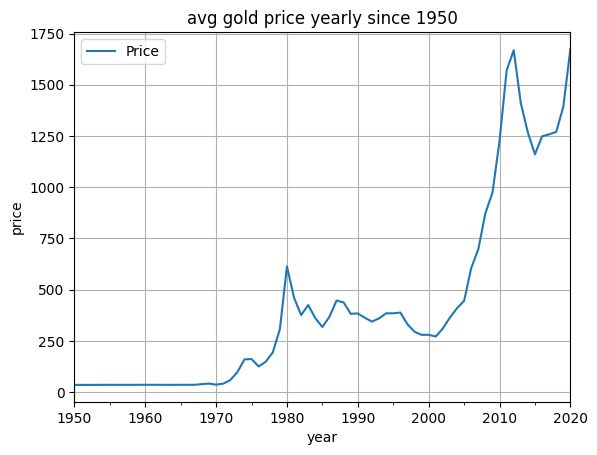

In [16]:
df_yearly_sum = df .resample('A').mean()
df_yearly_sum.plot();
plt.title("avg gold price yearly since 1950")
plt.xlabel("year")
plt.ylabel("price")
plt.grid();

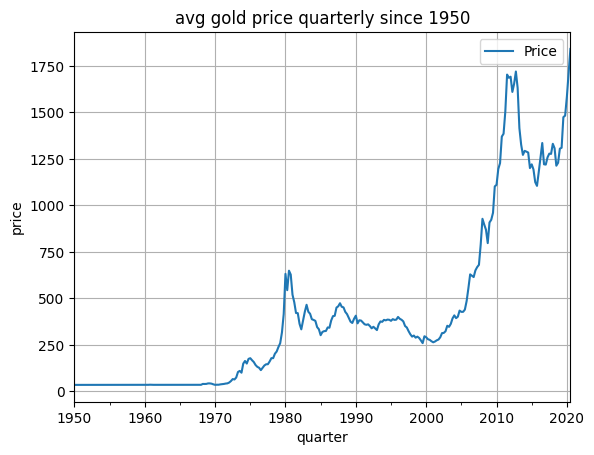

In [17]:
df_quaterly_sum = df.resample("Q").mean()
df_quaterly_sum.plot();
plt.title("avg gold price quarterly since 1950")
plt.xlabel("quarter")
plt.ylabel('price')
plt.grid();

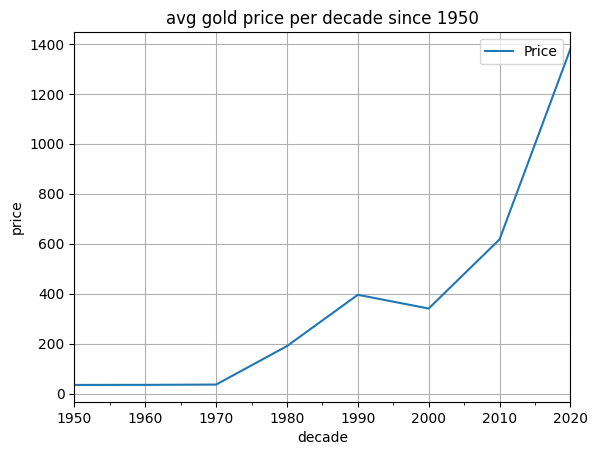

In [18]:
df_decade_sum=df.resample('10Y').mean()
df_decade_sum.plot();
plt.title("avg gold price per decade since 1950")
plt.xlabel('decade')
plt.ylabel('price')
plt.grid();

In [19]:
df_1=df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index = True)
df_1['Cov_pct']=((df_1['Std']/df_1["Mean"])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


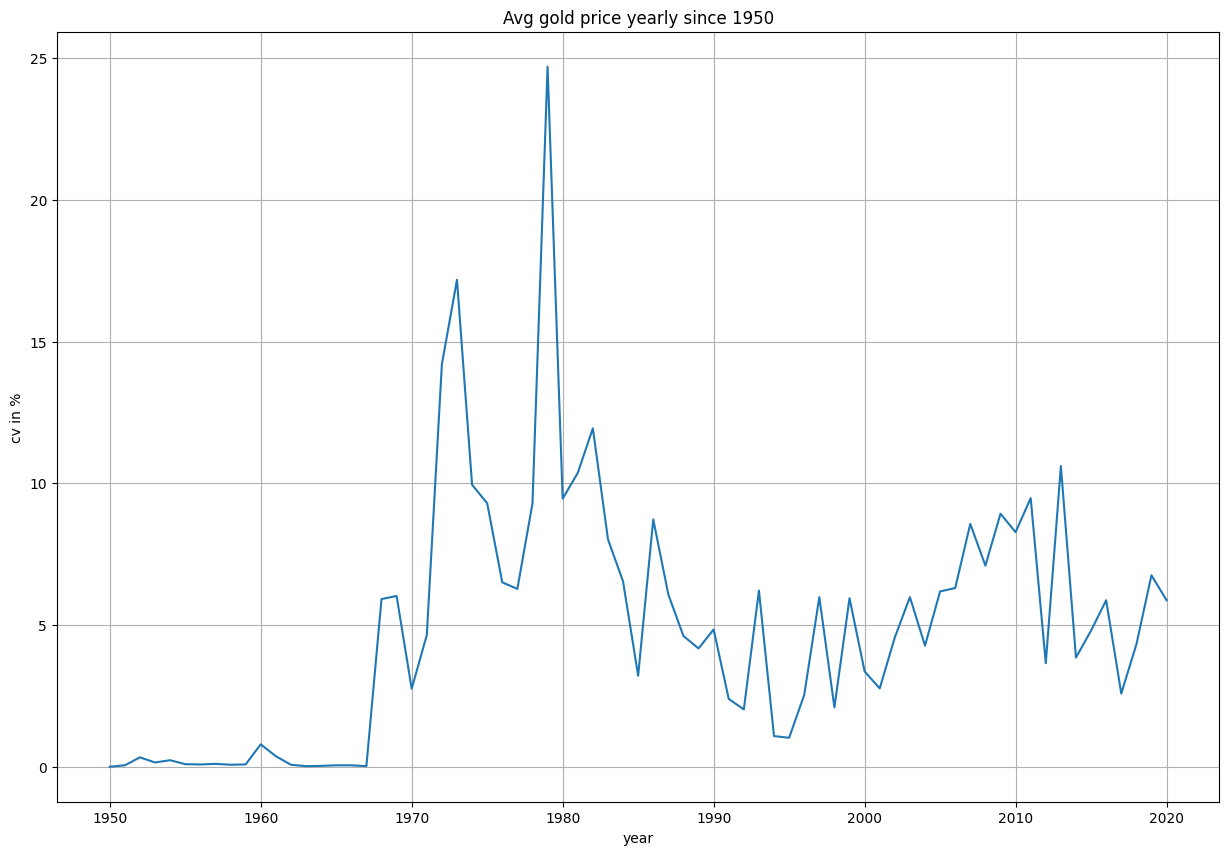

In [20]:
fig.ax=plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot();
plt.title("Avg gold price yearly since 1950")
plt.xlabel("year")
plt.ylabel('cv in %')
plt.grid()

In [22]:
train=df[df.index.year <= 2015]
test =df[df.index.year > 2015]

In [23]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


KeyError: 'price'

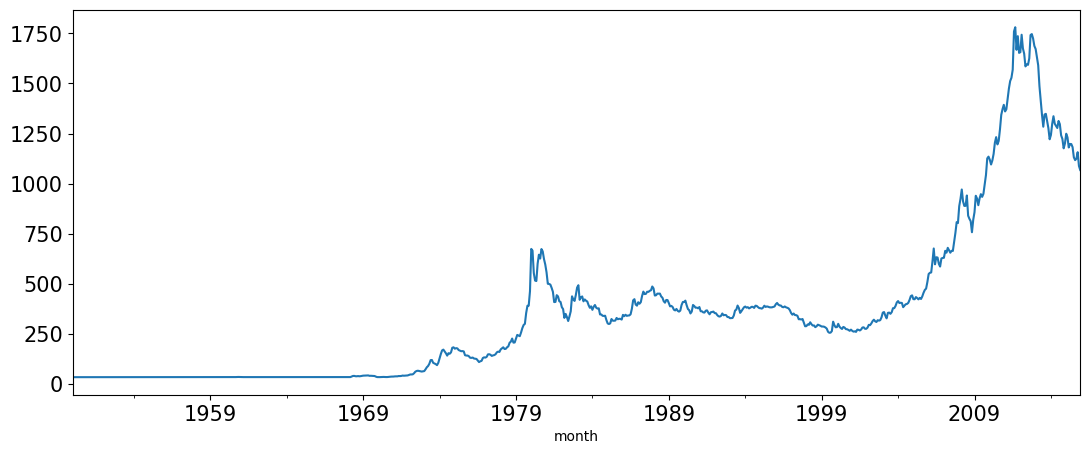

In [25]:
train["Price"].plot(figsize=(13,5),fontsize=15)
test["price"].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend(["Training Data",'tet Data'])
plt.show()

In [27]:
train_time =[i+1 for i in range(len(train))]
test_time =[i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [28]:
LR_train= train.copy()
LR_test=test.copy()

In [29]:
LR_train['time']=train_time
LR_test['time']=test_time

In [30]:
lr=LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

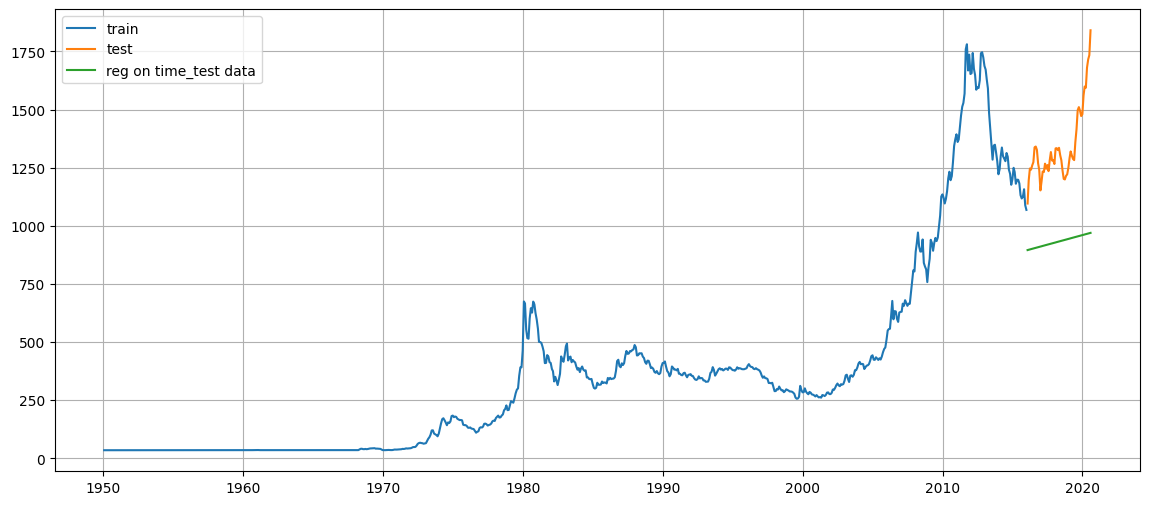

In [34]:
test_predictions_model1=lr.predict(LR_test[['time']])
LR_test['forecast']=test_predictions_model1

plt.figure(figsize = (14,6))
plt.plot(train['Price'],label='train')
plt.plot(test["Price"],label='test')
plt.plot(LR_test['forecast'],label ='reg on time_test data')
plt.legend(loc='best')
plt.grid();

In [39]:
def mape(actual,pred):
    return round((np.mean(abs(actual - pred)/actual))*100,2)

In [40]:
mape_model1_test = mape(test['Price'].values,test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")

MAPE is 29.760 %


In [44]:
results =pd.DataFrame({'Test Mape (%)':[mape_model1_test]},index=["RegressionOnTIme"])
results

,Test Mape (%)
RegressionOnTIme,29.76


In [45]:
Naive_train = train.copy()
Naive_test = test.copy()

In [46]:
Naive_test['naive'] =np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

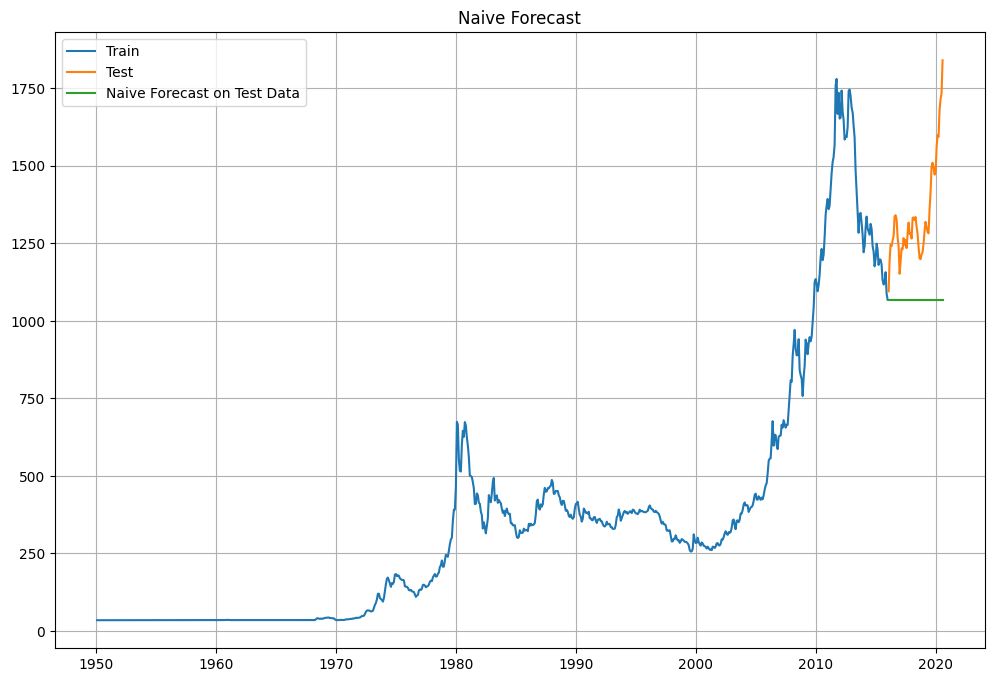

In [48]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(Naive_test['naive'],label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid()

In [53]:
mape_model2_test=mape(test['Price'].values,Naive_test['naive'].values)
print("For Naive forecast on Test Data,MAPE is%3.3f"%(mape_model2_test),"%")

For Naive forecast on Test Data,MAPE is19.380 %


In [55]:
resultsDf_2 = pd.DataFrame({'Test MAPE(%)':[mape_model2_test]},index=['NaiveModel'])
results = pd.concat([results,resultsDf_2])
results

,Test Mape (%),Test MAPE(%)
RegressionOnTIme,29.76,NaN
NaiveModel,NaN,19.38


In [56]:
final_model = ExponentialSmoothing(df,
                                   trend='additive',
                                   seasonal = 'additive').fit(smoothing_level=0.4,
                                                              smoothing_trend = 0.3,
                                                              smoothing_seasonal =0.6)

In [57]:
Mape_final_model=mape(df['Price'].values,final_model.fittedvalues)
print("MAPE:",Mape_final_model)

MAPE: 17.24


In [60]:
predictions= final_model.forecast(steps=len(test))

In [66]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96*np.std(final_model.resid,ddof=1),
                        'prediction':predictions,
                        'upper_CI': predictions+ 1.96*np.std(final_model.resid,ddof =1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.719922,1792.870894,1901.021866
2020-09-30,1615.305634,1723.456606,1831.607579
2020-10-31,1538.567122,1646.718094,1754.869067
2020-11-30,1476.757432,1584.908404,1693.059376
2020-12-31,1459.325790,1567.476763,1675.627735


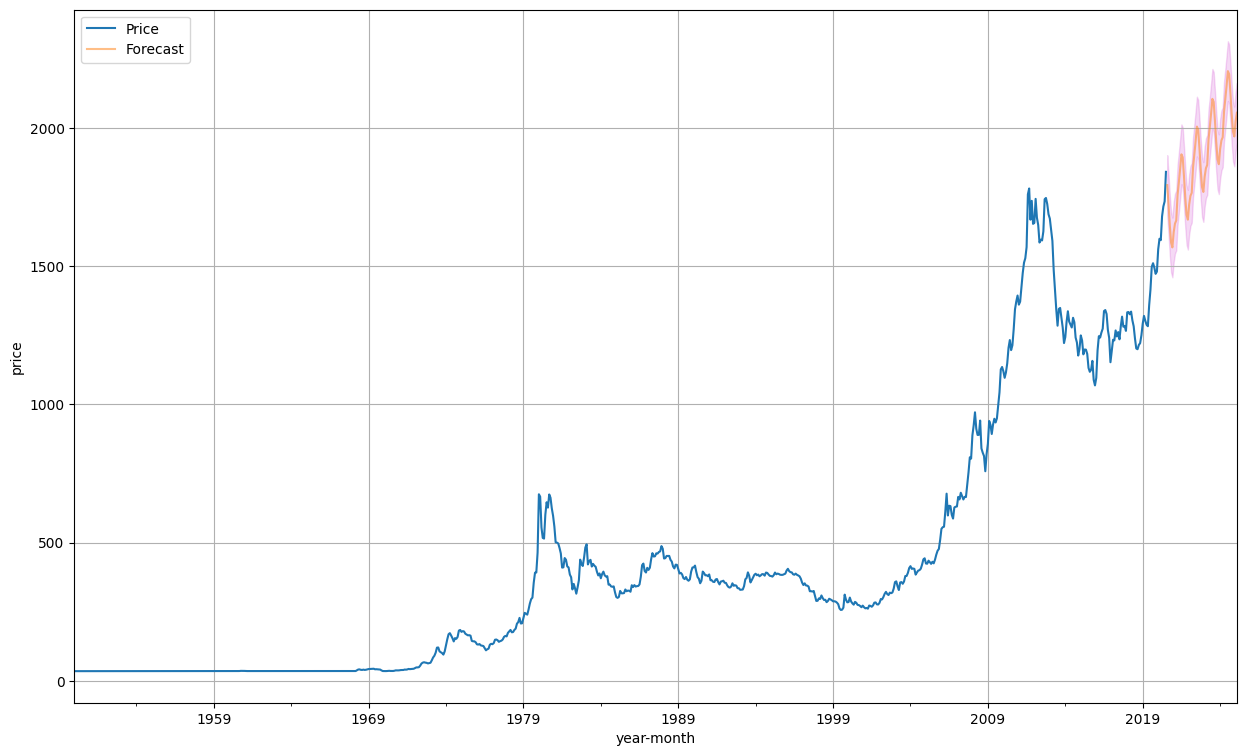

In [67]:
axis = df.plot(label ='Actual',figsize=(15,9))
pred_df['prediction'].plot(ax=axis,label = 'Forecast',alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'],pred_df['upper_CI'],color = 'm',alpha=.15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid()
plt.show()